In [1]:
import os, cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import xml.etree.ElementTree as ET
from keras.utils import to_categorical

%matplotlib inline

In [13]:
def saveClassOrder():
    xmlFileDir = r'C:\Users\WillyB\Documents\GitHub\embedded_project\Stanford40_XMLAnnotations\XMLAnnotations'
    os.chdir(xmlFileDir)
    xmlFileNames = [f for f in listdir(xmlFileDir) if isfile(join(xmlFileDir, f))]
    #xmlFileNames = ['3m1.xml','3m2.xml','3m3.xml','3m4.xml']
    classLabels = []
    imageNames = []
    count = 1
    for file in xmlFileNames:
        root = ET.parse(file).getroot()
        action = root.find('object/action').text
        classLabels.append(action)
        print(str(count)+'/'+str(len(xmlFileNames)), end='\r')
        count +=1
    (classUnique,counts) = np.unique(classLabels, return_counts=True)
    np.save(r'C:\Users\WillyB\Documents\GitHub\embedded_project\code/classOrder.npy', np.array(classUnique))
    print("classOrder.npy is created")
#saveClassOrder()

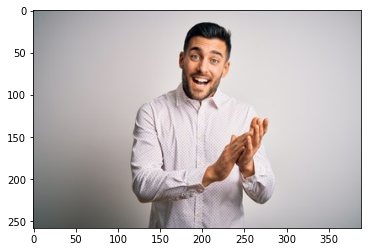

In [2]:
#Original image
original_imageDir = r'C:\Users\WillyB\Documents\GitHub\embedded_project\code\demo/original_test.jpg'
imgOrig = cv2.imread(original_imageDir)
plt.imshow(imgOrig[:,:,[2,1,0]])

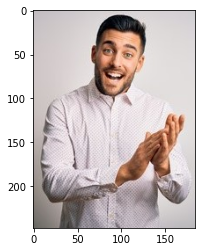

In [4]:
#Cropped Bounding boxes image to test
test_imageDir = r'C:\Users\WillyB\Documents\GitHub\embedded_project\code\demo/test_image.jpg'
test_image = cv2.imread(test_imageDir)
plt.imshow(test_image[:,:,[2,1,0]])

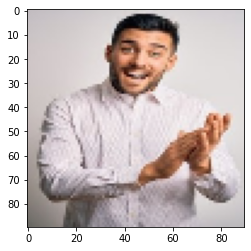

In [5]:

resizedImg = cv2.resize(test_image,(90,90))
plt.imshow(resizedImg[:,:,[2,1,0]])


In [6]:
modelDir = r'C:\Users\WillyB\Documents\GitHub\embedded_project\code\saved_model\my_model'
model = keras.models.load_model(modelDir)
prediction = model.predict(resizedImg[np.newaxis,...])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [7]:
prediction

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [39]:
classOrder = np.load(r'C:\Users\WillyB\Documents\GitHub\embedded_project\code/classOrder.npy')

In [41]:
classOrder

array(['applauding', 'blowing_bubbles', 'brushing_teeth',
       'cleaning_the_floor', 'climbing', 'cooking', 'cutting_trees',
       'cutting_vegetables', 'drinking', 'feeding_a_horse', 'fishing',
       'fixing_a_bike', 'fixing_a_car', 'gardening',
       'holding_an_umbrella', 'jumping', 'looking_through_a_microscope',
       'looking_through_a_telescope', 'phoning', 'playing_guitar',
       'playing_violin', 'pouring_liquid', 'pushing_a_cart', 'reading',
       'riding_a_bike', 'riding_a_horse', 'rowing_a_boat', 'running',
       'shooting_an_arrow', 'smoking', 'taking_photos', 'texting_message',
       'throwing_frisby', 'using_a_computer', 'walking_the_dog',
       'washing_dishes', 'watching_TV', 'waving_hands',
       'writing_on_a_board', 'writing_on_a_book'], dtype='<U28')

In [46]:
classOrder[np.argmax(prediction)]

'cutting_vegetables'

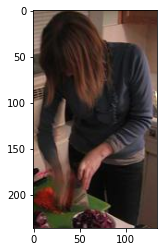

In [48]:
cutting_vegetableImage = r'C:\Users\WillyB\Documents\GitHub\embedded_project\Stanford40_JPEGImages\ActionImages\cutting_vegetables/cutting_vegetables_109.jpg'
cvImage = cv2.imread(cutting_vegetableImage)
plt.imshow(cvImage[:,:,[2,1,0]])